<a href="https://colab.research.google.com/github/mdjespc/tutoring/blob/main/random_data_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from numpy.random import Generator, PCG64, SeedSequence
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

<h1>Random Sampling</h1>

Generator can be used as a replacement for RandomState. Both class instances hold a internal BitGenerator instance to provide the bit stream, it is accessible as gen.bit_generator. Some long-overdue API cleanup means that legacy and compatibility methods have been removed from Generator. Seeds can be passed to any of the BitGenerators. The provided value is mixed via SeedSequence to spread a possible sequence of seeds across a wider range of initialization states for the BitGenerator.

In [ ]:
#Generate a seed sequence to feed the generator
sq = SeedSequence()
#Here PCG64 is used and is wrapped with a Generator.
#Initialize our generator
rng = Generator(PCG64(sq.generate_state(6)))

In [ ]:
#generate 10 random integers between 0 (inclusive) and 100 (exclusive):
y = rng.integers(low = 0, high = 101, size = 10)
y_2 = rng.integers(low = 0, high = 101, size = 10)
x = [i for i in range(1, 11)]
print(y, y_2, x)

[89 67 74 94 74 96  7 53 47 57] [37  5 49  0 94 78 96 97 39 24] [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


<h1>Scatter Plot</h1>

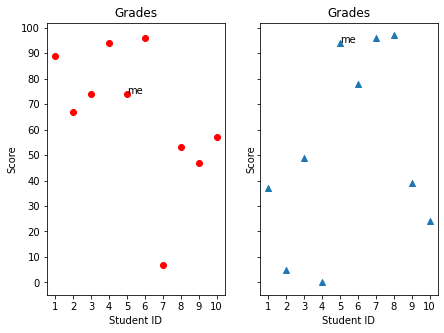

In [ ]:
#Plot the data in a scatter plot
#Set the figure
#Unpack the figure and axes returned by the subplot method (ax1 = subplot 1, ax2 = subplot 2)
fig, (ax1, ax2) = plt.subplots(1, 2, sharex = True, sharey = True, num = 'CSCI 127', figsize = [7, 5])
#Scatter plot
ax1.scatter(x, y, c = 'red')
ax1.set(title = 'Grades', ylabel = 'Score', xlabel = 'Student ID')
ax2.scatter(x, y_2, marker = '^')
ax2.set(title = 'Grades', ylabel = 'Score', xlabel = 'Student ID')
#Configure our plot
ax1.xaxis.set_major_locator(MultipleLocator(1))
ax1.yaxis.set_major_locator(MultipleLocator(10))
ax2.xaxis.set_major_locator(MultipleLocator(1))
ax2.yaxis.set_major_locator(MultipleLocator(10))
ax1.annotate('me', (5, y[4]))
ax2.annotate('me', (5, y_2[4]))
plt.show()

# Histograms

We have $n$ dice and we toss them simultaneously $k$ times. Plot a histogram that shows the probability of the sum of the dice being $x$ using long term frequency.

(For example: we toss 3 die and get a sum of 13, 45 out of 100 times)

In [2]:
import random

In [21]:
#initialize our variables
dice = (1, 2, 3, 4, 5, 6)
n = 2
k = 500000

In [5]:
#define how we throw the dice
def throw(n, k):
  evt = []
  for i in range(k):
    evt.append(0)
    for j in range(n):
      evt[i] += random.choice(dice)
      #evt[i] can be any number between n and n*6
  return np.array(evt)

In [6]:
#show the long term frequency of each outcome
def ltf(outcomeArray):
  #Return the number of times each sum appears in the outcome array
  return np.unique(outcomeArray, return_counts = True)

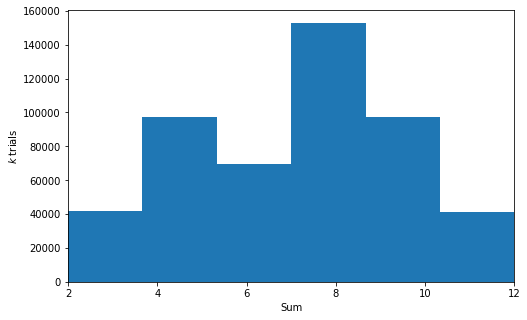

X = 2 ---------> Frequency: 13843/500000 =  0.03
X = 3 ---------> Frequency: 27820/500000 =  0.06
X = 4 ---------> Frequency: 41481/500000 =  0.08
X = 5 ---------> Frequency: 55574/500000 =  0.11
X = 6 ---------> Frequency: 69678/500000 =  0.14
X = 7 ---------> Frequency: 83421/500000 =  0.17
X = 8 ---------> Frequency: 69425/500000 =  0.14
X = 9 ---------> Frequency: 55487/500000 =  0.11
X = 10 ---------> Frequency: 41795/500000 =  0.08
X = 11 ---------> Frequency: 27476/500000 =  0.05
X = 12 ---------> Frequency: 14000/500000 =  0.03
Total Frequency: 500000/500000 
Total Probability:  1.00


In [23]:
#the throw function returns an array of the sums of the dice being thrown, so we can plot it using a histogram
experiment = throw(n, k)
plt.figure(figsize = [8, 5])
plt.hist(experiment, bins = 6)
plt.xlabel('Sum')
plt.ylabel('$k$ trials')
plt.xlim(n, n*6)
plt.show()
#Print the long term frequencies
val, f = ltf(experiment)
for v in val:
  print('X = %d ---------> Frequency: %d/%d = %5.2f'%(v, f[v - n], k, (f[v - n]/k)))
print('Total Frequency: %d/%d \nTotal Probability: %5.2f' %(sum(f), k, sum(f)/k))